In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import time

In [4]:
df = pd.read_csv('diabetes.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

Провеведем исследование качества модели от глубины используемых деревьев. Отрисуем зависимость на графике

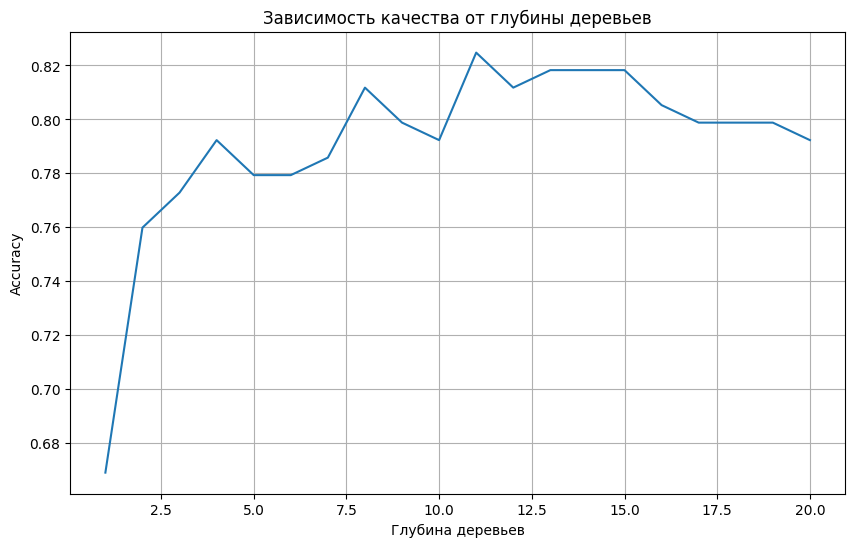

In [14]:
depths = range(1, 21)
test_acc = []

for depth in depths:
    rf = RandomForestClassifier(max_depth=depth, random_state=13)
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    test_acc.append(accuracy_score(y_test, pred))

plt.figure(figsize=(10, 6))
plt.plot(depths, test_acc)
plt.xlabel('Глубина деревьев')
plt.ylabel('Accuracy')
plt.title('Зависимость качества от глубины деревьев')
plt.grid(True)
plt.show()

С увеличением глубины до 8 наблюдается рост точности, после чего accuracy стабилизируется. Более глубокие деревья приводят к небольшому переобучению.

Проведем исследование качества модели от количества подаваемых на дерево признаков. Отрисуем зависимость на графике

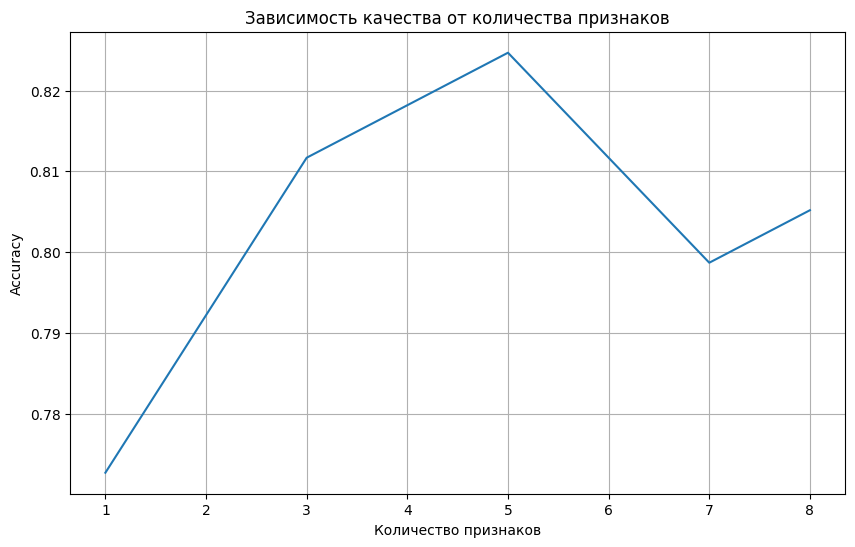

In [15]:
max_features = range(1, X.shape[1]+1)
test_acc_features = []

for f in max_features:
    rf = RandomForestClassifier(max_features=f, random_state=13)
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    test_acc_features.append(accuracy_score(y_test, pred))

plt.figure(figsize=(10, 6))
plt.plot(max_features, test_acc_features)
plt.xlabel('Количество признаков')
plt.ylabel('Accuracy')
plt.title('Зависимость качества от количества признаков')
plt.xticks(range(1, X.shape[1]+1))
plt.grid(True)
plt.show()

Наибольшая точность достигается при использовании 4-5 признаков. Уменьшение или увеличение этого числа ухудшает качество модели

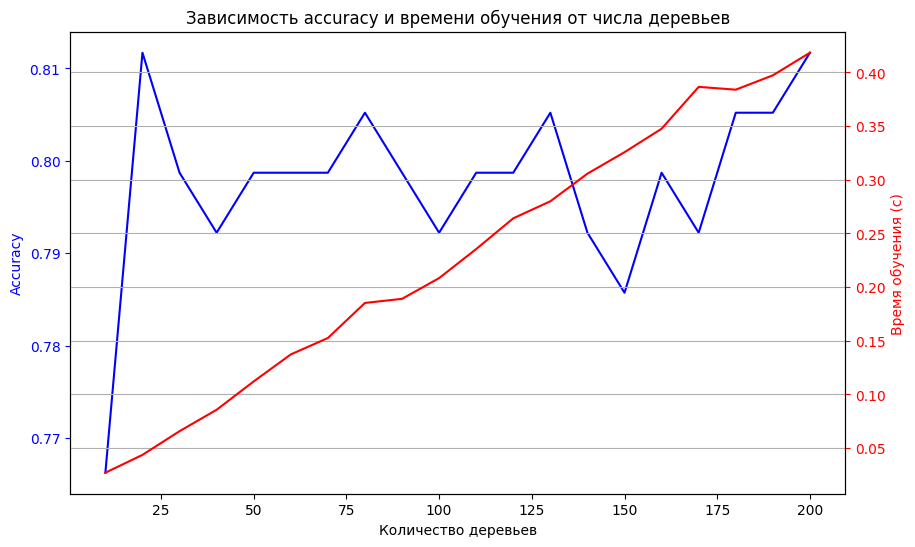

In [51]:
n_estimators = range(10, 210, 10)
accuracies = []
times = []

for n in n_estimators:
    start = time.time()
    rf = RandomForestClassifier(n_estimators=n, random_state=13)
    rf.fit(X_train, y_train)
    end = time.time()
    times.append(end - start)
    pred = rf.predict(X_test)
    accuracies.append(accuracy_score(y_test, pred))

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(n_estimators, accuracies, 'b')
ax1.set_xlabel('Количество деревьев')
ax1.set_ylabel('Accuracy', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(n_estimators, times, 'r')
ax2.set_ylabel('Время обучения (с)', color='r')
ax2.tick_params('y', colors='r')

plt.title('Зависимость accuracy и времени обучения от числа деревьев')
plt.grid(True)
plt.show()

Качество наилучшее при маленьком и большом числе деревьев, между ними наблюдается проседание качества. Время обучения растет линейно.

In [50]:
bst = XGBClassifier(learning_rate=0.1, max_depth=2, n_estimators=150, subsample=0.8, reg_lambda=4, random_state=13)

start_time = time.time()
bst.fit(X_train, y_train)
bst_time = time.time() - start_time
bst_pred = bst.predict(X_test)
print("Accuracy:", accuracy_score(y_test, bst_pred))
print("Время обучения:", bst_time)

Accuracy: 0.8246753246753247
Время обучения: 0.049733638763427734


При правильной настройке гиперпараметров XGBoost превосходит модель случайного леса. Притом время обучения у него значительно меньше.